In [2]:
import numpy as np # generic math functions
import math
import matplotlib.pyplot as plt
import os, glob
import pickle
import seaborn as sns
import random
from time import time

from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spinless_fermion_basis_1d, tensor_basis # Hilbert space fermion and tensor bases

from modules.pluckers import *

%load_ext autoreload
%autoreload 2
sns.set(style="whitegrid", context="talk", font_scale=1.0, palette=sns.color_palette("bright"), color_codes=False)
plt.rcParams["figure.figsize"] = (9,6)

folder_for_figures = 'results_Haar/figures_Haar/'
folder_for_data = 'results_Haar/data_Haar/'

## Higher Pluckers

In [16]:
number_of_realizations = 1
L = 12
Nf = 10

filename_pluckers_gen = folder_for_data + 'Plucker_L={}_Nf={}'.format(L, Nf)

for realization in range(number_of_realizations):
    print('It is {} realization'.format(realization))
    
    basis = spinless_fermion_basis_1d(L,Nf)
    vrnd = np.random.randn(basis.Ns)
    vec = vrnd/np.linalg.norm(vrnd)
    
    Pluckers_temp = PluckersSpinless(min(Nf,L-Nf), basis, vec)
    
    identifyer = random.randint(0, 1000000000)
    filename_Plucker = filename_pluckers_gen + '_{}.pkl'.format(identifyer)

    with open(filename_Plucker, 'wb') as f_P:
        pickle.dump(Pluckers_temp, f_P)

It is 0 realization
We calculated 0 Plucker of 2 to be 1.0 for 0.00 seconds
We calculated 1 Plucker of 2 to be 1.3132704757266407 for 0.14 seconds
We calculated 2 Plucker of 2 to be 1.3132704757266414 for 3.79 seconds


In [17]:
number_of_realizations = 1
L = 12
Nf = 11

filename_pluckers_gen = folder_for_data + 'Plucker_L={}_Nf={}'.format(L, Nf)

for realization in range(number_of_realizations):
    print('It is {} realization'.format(realization))
    
    basis = spinless_fermion_basis_1d(L,Nf)
    vrnd = np.random.randn(basis.Ns)
    vec = vrnd/np.linalg.norm(vrnd)
    
    Pluckers_temp = PluckersSpinless(min(Nf,L-Nf), basis, vec)
    
    identifyer = random.randint(0, 1000000000)
    filename_Plucker = filename_pluckers_gen + '_{}.pkl'.format(identifyer)

    with open(filename_Plucker, 'wb') as f_P:
        pickle.dump(Pluckers_temp, f_P)

It is 0 realization
We calculated 0 Plucker of 1 to be 1.0 for 0.00 seconds
We calculated 1 Plucker of 1 to be -2.42861286636753e-17 for 0.13 seconds


In [8]:
number_of_realizations = 1
L = 12
Nf = 7

filename_pluckers_gen = folder_for_data + 'Plucker_L={}_Nf={}'.format(L, Nf)

for realization in range(number_of_realizations):
    print('It is {} realization'.format(realization))
    
    basis = spinless_fermion_basis_1d(L,Nf)
    vrnd = np.random.randn(basis.Ns)
    vec = vrnd/np.linalg.norm(vrnd)
    
    Pluckers_temp = PluckersSpinless(min(Nf,L-Nf), basis, vec)
    
    identifyer = random.randint(0, 1000000000)
    filename_Plucker = filename_pluckers_gen + '_{}.pkl'.format(identifyer)

    with open(filename_Plucker, 'wb') as f_P:
        pickle.dump(Pluckers_temp, f_P)

It is 0 realization
We calculated 0 Plucker of 5 to be 1.0 for 0.01 seconds
We calculated 1 Plucker of 5 to be 2.866758728572233 for 2.03 seconds
We calculated 2 Plucker of 5 to be 3.444838448786694 for 56.37 seconds
We calculated 3 Plucker of 5 to be 1.1561594404289264 for 369.33 seconds
We calculated 4 Plucker of 5 to be 0.5780797202144737 for 1196.22 seconds
We calculated 5 Plucker of 5 to be 8.334804200982315e-19 for 1208.69 seconds


#### Reading out and averaging

[0. 0. 0. 0. 0. 0.]


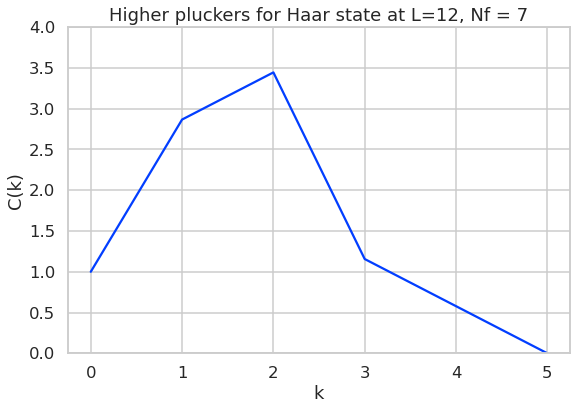

In [14]:
L = 12
Nf = 7

cwd = os.getcwd()
destdir = cwd + '/' +  folder_for_data
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

Plucker_files = [f for f in files if f[0] == 'P' and int(f[f.find("L=")+2:f.find("_Nf")]) == L and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 

P = np.zeros(min(Nf+1,L-Nf+1))
for file in Plucker_files:
    with open(folder_for_data + file, 'rb') as f:
        Pluckers_temp = pickle.load(f)
        print(P)
        P = P + np.array(Pluckers_temp)

plt.plot(range(len(P)), P/len(Plucker_files), label='Nf={}'.format(Nf));
plt.title("Higher pluckers for Haar state at L={}, Nf = {}".format(L, Nf))
plt.xlabel("k")
#plt.legend()
plt.ylabel("C(k)")
plt.ylim([0,4])
plt.show()

## Entanglement entropy

In [30]:
number_of_realizations = 3
L = 12
Nf = L//2

basis = spinless_fermion_basis_1d(L=L,Nf=Nf)
filename_entropies_gen = folder_for_data + 'Entropies_L={}_Nf={}'.format(L, Nf)

for realization in range(number_of_realizations):
    print('It is {} realization'.format(realization))

    basis = spinless_fermion_basis_1d(L,Nf=L//2)
    vrnd = np.random.randn(basis.Ns)
    vec = vrnd/np.linalg.norm(vrnd)

    S = []
    for k in range(1, L): #sub-sys size
        sites = [i for i in range(k)]
        ent_val = basis.ent_entropy(vec, sub_sys_A=sites, return_rdm='both', return_rdm_EVs='True')
        S.append(k * ent_val['Sent_A'])

    identifyer = random.randint(0, 1000000000)
    filename_Entropy = filename_entropies_gen  + '_{}.pkl'.format(identifyer)
    with open(filename_Entropy, 'wb') as f_S:
        pickle.dump(S, f_S)

It is 0 realization
It is 1 realization
It is 2 realization


#### Reading out and averaging

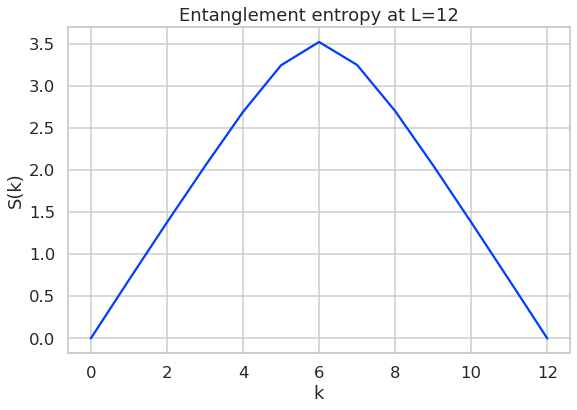

In [42]:
L = 12
Nf = L//2

cwd = os.getcwd()
destdir = cwd + '/' +  folder_for_data
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

Entropy_files = [f for f in files if f[0] == 'E' and int(f[f.find("L=")+2:f.find("_Nf")]) == L and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 

S = np.zeros(L-1)

for file in Entropy_files:
    with open(folder_for_data + file, 'rb') as f:
        Entropy_temp = pickle.load(f)
        S = S + np.array(Entropy_temp)

plt.plot(range(len(S)+2), [0]+list(S/len(Entropy_files))+[0], label='Nf={}'.format(Nf));
plt.title("Entanglement entropy at L={}".format(L))
plt.xlabel("k") 
plt.ylabel("S(k)")
plt.show() 